In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
import sys
sys.path.append('/Users/khatri/code/coding_tests/ssd/data_preprocessing/')
# import ssd
# from ssd.data_preprocessing import ground_truth
from ground_truth import GTBuilder
from data_loader import read_labels_from_xml

In [2]:
image_file = '../data/VOCdevkit/VOC2012/JPEGImages/2011_006135.jpg'
img = Image.open(image_file)
img = img.resize((224, 224))

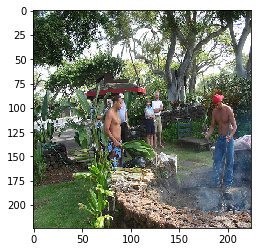

In [3]:
plt.imshow(img)

In [4]:
gt_maps = np.load("../data/VOCdevkit/VOC2012/Preprocessed/2011_006135.npz")

In [11]:
print gt_maps.keys()
print gt_maps['4'].dtype

['8', '12', '20', '4', '16']
float64


In [6]:
def draw_boxes(im, boxes):
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)
    
    for box in boxes:
#         print box.__dict__
        x_top = max(box.xc - box.width/2.0, 0)
        y_top = max(box.yc - box.height/2.0, 0)
        # Create a Rectangle patch
        rect = patches.Rectangle((x_top, y_top), box.width, box.height,
                                 linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()
    

In [7]:
feature_sizes = [20, 16, 12, 8, 4, 2]
num_scales = len(feature_sizes)
aspect_ratios = [1, 2, 3, 1 / 2.0, 1 / 3.0]
classes = ["background", "person", "bird", "cat", "cow", "dog", "horse", "sheep", "aeroplane", "bicycle", "boat", "bus",
               "car", "motorbike", "train", "bottle", "chair", "diningtable", "pottedplant", "sofa", "tvmonitor"]
num_classes = len(classes)
class_to_index = {key: value for (key, value) in zip(classes, range(num_classes))}
gt_builder = GTBuilder(feature_sizes, aspect_ratios, num_scales, class_to_index)


8


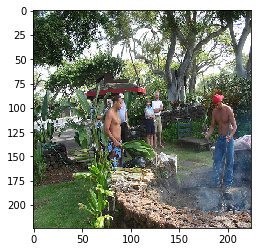

12


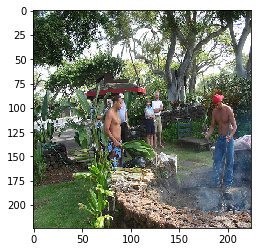

20


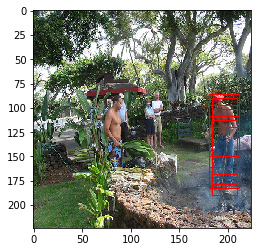

4


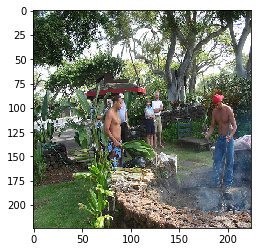

16


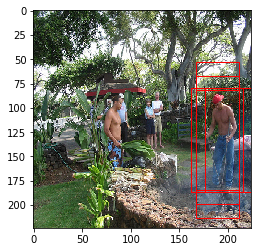

In [8]:
test_path = '../data/VOCdevkit/VOC2012/Annotations/2011_006135.xml'
gt_xml = read_labels_from_xml(test_path)[0]

# draw_boxes(img, boxes)

for key in gt_maps.keys():
    gt_map = gt_maps[key]
    key = int(key)
    
    feature_index = feature_sizes.index(key)
    x, y, z = np.where(gt_map > 0)
    indices = zip(x, y, z)
    boxes = []
    for index in indices:
        boxes.append(gt_builder.index_to_bbox(*(list(index) + [feature_index])))
#         break
    print key
    draw_boxes(img, boxes)
#     print boxes[0].__dict__
#     print gt_xml.__dict__
#     print gt_xml.compute_IoU(boxes[0])
        
# gt_builder.index_to_bbox()

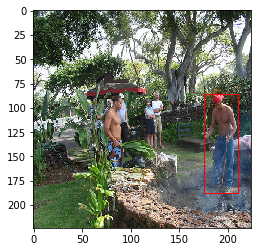

In [9]:
test_path = '../data/VOCdevkit/VOC2012/Annotations/2011_006135.xml'
boxes = read_labels_from_xml(test_path)
draw_boxes(img, boxes)


In [10]:
# img_full = Image.open('../data/VOCdevkit/VOC2012/JPEGImages/2007_002055.jpg')
# fig,ax = plt.subplots(1)
# ax.imshow(img_full)

# rect = patches.Rectangle((174, 101), 175, 250,
#                                  linewidth=1, edgecolor='r', facecolor='none')
# # Add the patch to the Axes
# ax.add_patch(rect)

# plt.show()